## **Car Price Prediction Using Machine Learning Simple Linear Regression Algorithm**

---


### **Step 1 :** Ignore Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Project Overview**

1. Machine Learning Process
2. Problem Formulation
3. Collecting Raw Data
4. Data Preprocessing
    - Cleaning
    - Visualizing
    - Analyzing
5. Spliting the data
6. Running Regression
7. Evaluation Metrics

### **Step 2 :** Understand Machine  Learning Process

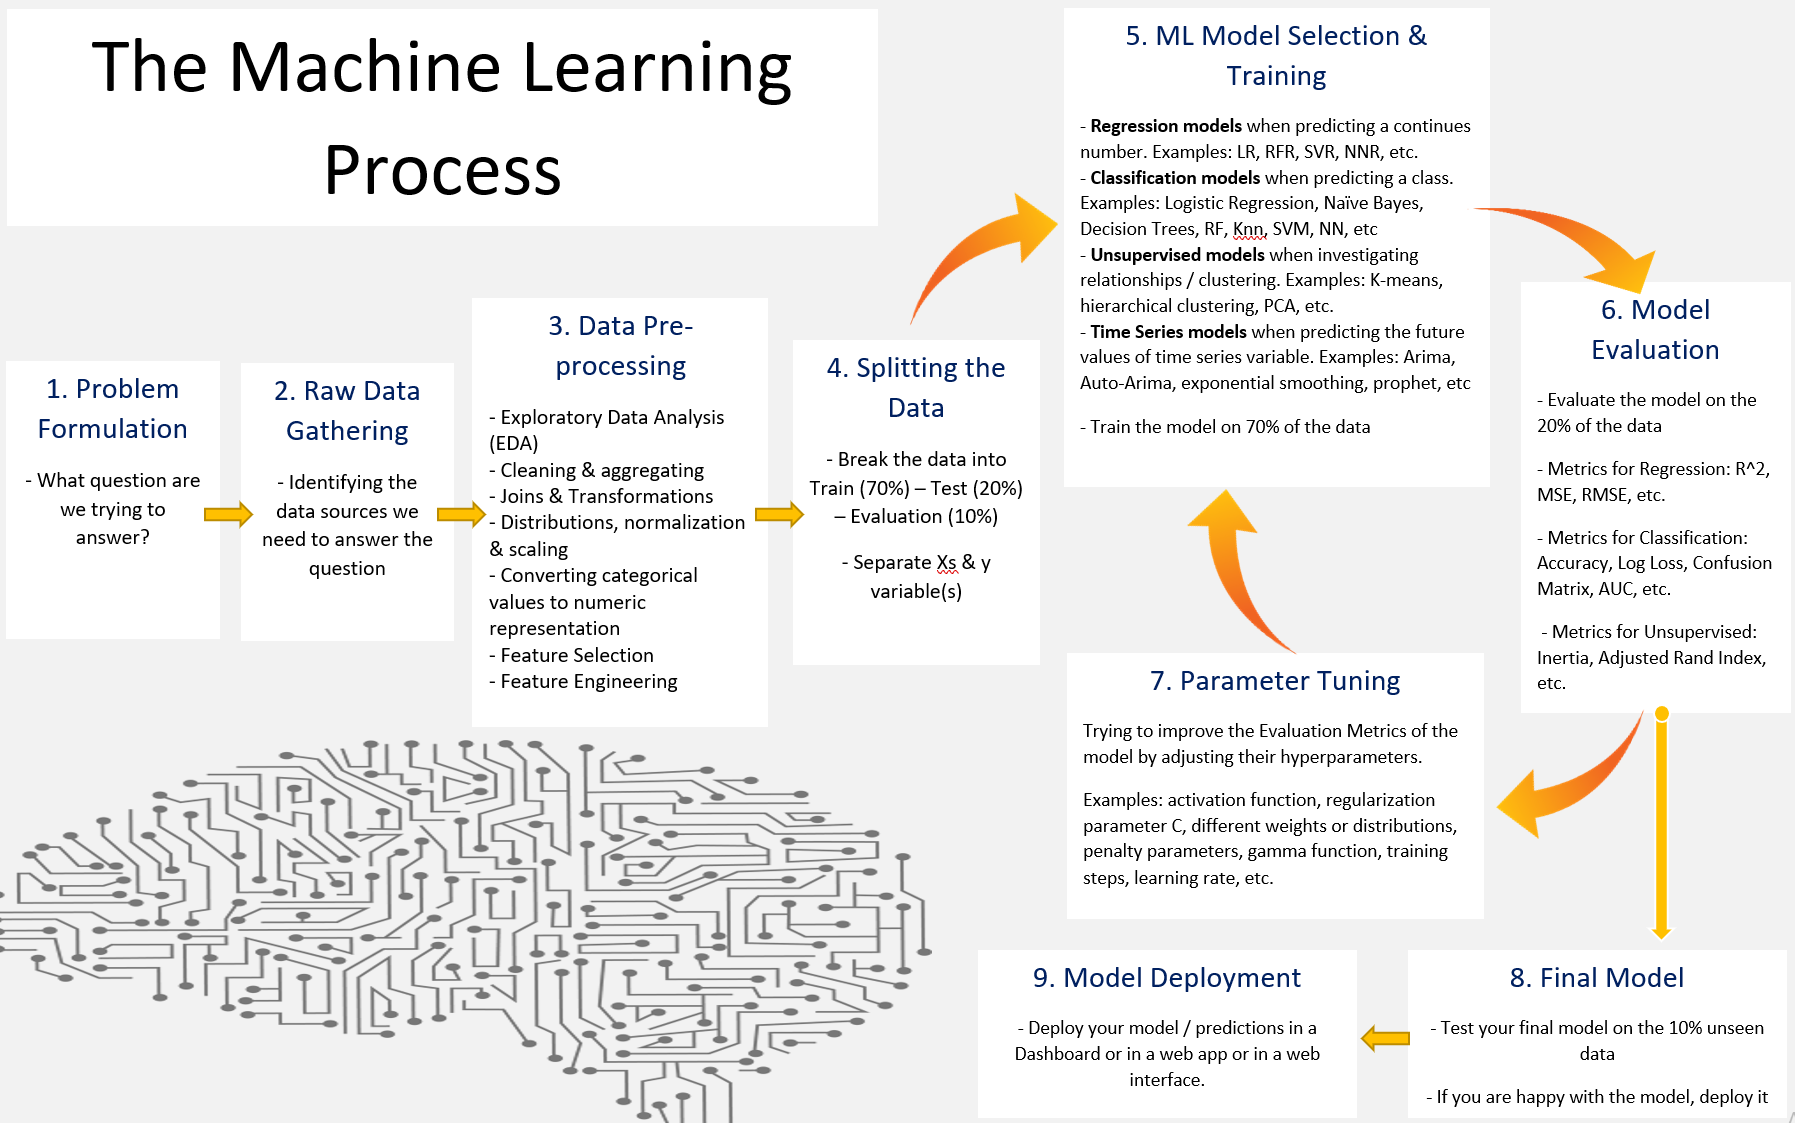

In [2]:
from IPython.display import Image
Image("ml_process.png",width=400, height=300)

###  **Step 3 :**  Problem Statement Formulation
- We want to understand which variables affect the car prices
- We want to be able to predict car prices

In [3]:
# ! pip install openpyxl

In [4]:
# Read The Data to Understand The Dataset interms of Features and label
# Import Pandas to read the file
import pandas as pd
# Reading excel file using pandas
car_data = pd.read_excel("car_data.xlsx")

# Print some part of data to understand it
car_data.head()

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


In [5]:
# Deep dive into data understanding
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non-null   

### **Feature Information for `car_data`**

- **index**: A unique identifier for each entry in the dataset.
- **Make**: The manufacturer of the car (e.g., Audi, Aston Martin).
- **Model**: The specific model of the car (e.g., A3, DBX707).
- **Year**: The manufacturing year of the car.
- **Trim**: The specific trim level or version of the car model.
- **MSRP**: Manufacturer's Suggested Retail Price (new car price).
- **Invoice Price**: The price at which the dealer buys the car from the manufacturer.
- **Used/New Price**: The listed price of the car, which could be for a new or used vehicle.
- **Body Size**: Categorization of the car's size (e.g., Compact, Large).
- **Body Style**: The style of the car's body (e.g., Sedan, SUV).
- **Cylinders**: The number and configuration of cylinders in the engine (e.g., I4, V8).
- **Engine Aspiration**: How air is supplied to the engine (e.g., Turbocharged, Twin-Turbo).
- **Drivetrain**: The system that delivers power from the engine to the wheels (e.g., FWD, AWD).
- **Transmission**: The type of gearbox in the car (e.g., automatic).
- **Horsepower**: The engine's power output, usually in 'hp @ rpm'.
- **Torque**: The rotational force produced by the engine, usually in 'ft-lbs. @ rpm'.
- **Highway Fuel Economy**: The estimated fuel efficiency of the car on highways, in miles per gallon (mpg).

In [6]:
print('Size of the Data we will deal = ', car_data.size)
print('Shape of the Data we will deal = ', car_data.shape)

Size of the Data we will deal =  27370
Shape of the Data we will deal =  (1610, 17)


### **Step 4 =** Preparer Dataset Ready to Go for ML application


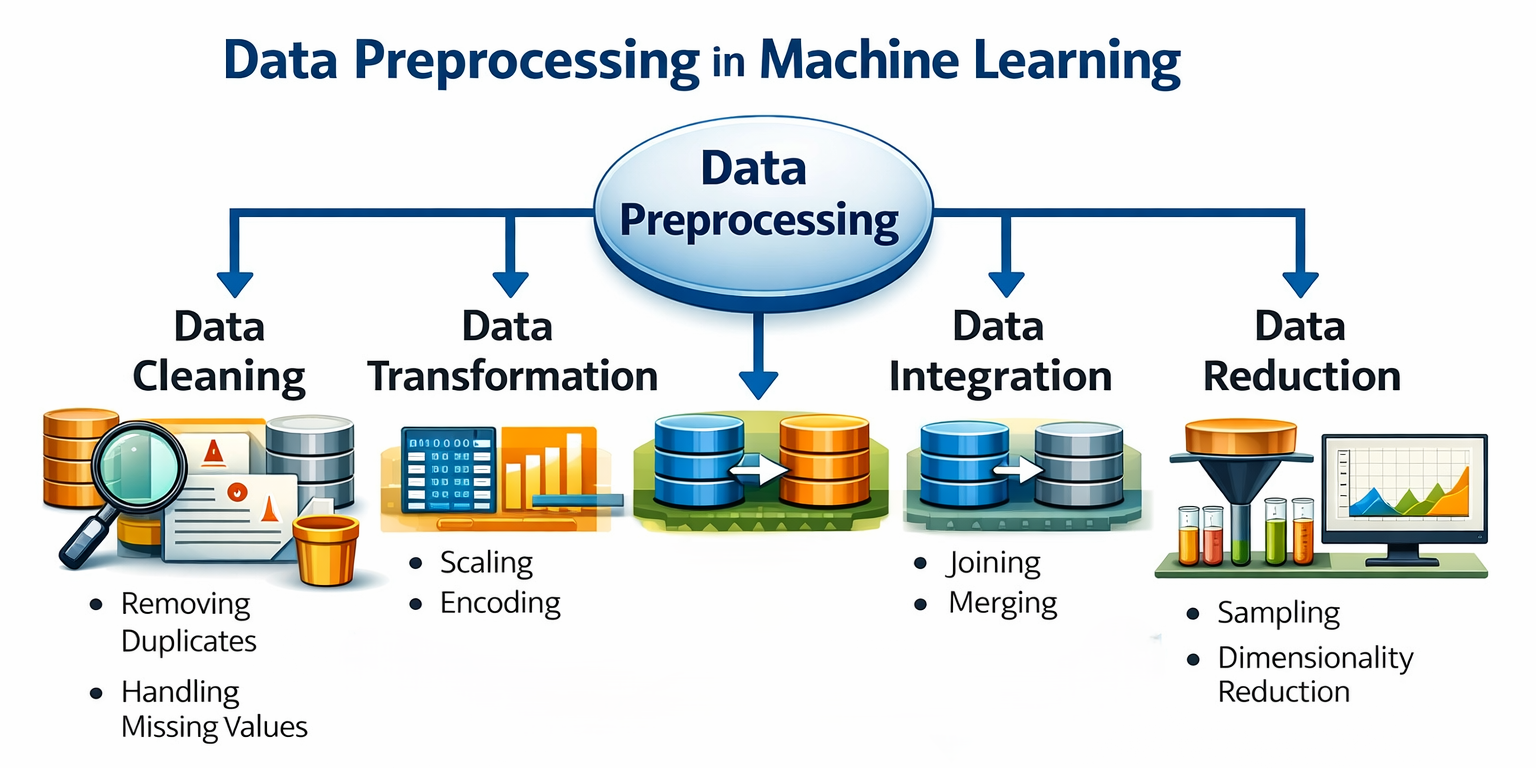

In [7]:
Image("Data Cleaning.png",width=300, height=150)

### **Step 4.1 = Data Cleaning**
    4.1.a = Remove Duplicates
    4.1.b = Dealing with Missing values
    4.1.c = Dealing with data types

In [8]:
# 4.1. Data Cleaning -
# a. Removing Duplicates
duplicates = car_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


### **No Duplicates In Dataset**

In [9]:
# 4.1. Data Cleaning
# b. Handling Missing values
car_data.isnull().sum()

index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64

### **Findings**
Total 5 columns Have missing values
1. Invoice Price        = 552
2. Cylinders            = 165
3. Horsepower           = 5
4. Torque               = 27
5. Highway Fuel Economy = 424

In [10]:
# Meanwhile droping the columns that have lot's of nulls
car_data = car_data.drop(['Invoice Price', 'Cylinders','Highway Fuel Economy'], axis=1)

**Only Two columns remain to deal with missing values**

⛳ Note : Horsepower column is categorical before we deal with it we need to `extract exact information` from it hen `deal with Missing values`


In [11]:
# Have a look at Horsepower column
car_data['Horsepower'][:4]
# We are intrested in Hoesepower value not a RPM (revolutions per minute)

0    697 hp @ 6000 rpm
1    201 hp @ 4800 rpm
2    201 hp @ 5000 rpm
3    201 hp @ 5000 rpm
Name: Horsepower, dtype: object

In [12]:
# creating a new column to get horsepower values
car_data['Horsepower_No'] = car_data['Horsepower'].str[0:3].astype(float)
car_data['Horsepower_No'][:5]

0    697.0
1    201.0
2    201.0
3    201.0
4    201.0
Name: Horsepower_No, dtype: float64

In [13]:
# Now find missing values in horsepower_no column
car_data[car_data['Horsepower_No'].isna()]

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
371,971,Ford,F-150 Lightning,2024,Flash,"$67,995","$67,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
372,972,Ford,F-150 Lightning,2024,Lariat,"$76,995","$76,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
373,973,Ford,F-150 Lightning,2024,Platinum,"$84,995","$84,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
374,974,Ford,F-150 Lightning,2024,Pro,"$54,995","$54,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
375,975,Ford,F-150 Lightning,2024,XLT,"$62,995","$62,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN


In [14]:
#car_data['Make'].unique()
car_data[car_data['Make'] ==  'Ford'].value_counts()

index  Make  Model                  Year  Trim                           MSRP     Used/New Price  Body Size  Body Style       Engine Aspiration    Drivetrain  Transmission  Horsepower         Torque                  Horsepower_No
858    Ford  Bronco                 2024  Badlands                       $50,095  $50,095         Compact    Convertible SUV  Turbocharged         4WD         manual        300 hp @ 5700 rpm  325 ft-lbs. @ 3400 rpm  300.0            1
4139   Ford  F-250 Super Duty       2023  XL                             $50,560  $50,560         Large      Pickup Truck     Naturally Aspirated  4WD         automatic     405 hp @ 5000 rpm  445 ft-lbs. @ 4000 rpm  405.0            1
4132   Ford  F-250 Super Duty       2023  Lariat                         $61,410  $61,410         Large      Pickup Truck     Naturally Aspirated  4WD         automatic     430 hp @ 5500 rpm  485 ft-lbs. @ 4000 rpm  430.0            1
4133   Ford  F-250 Super Duty       2023  Lariat                 

In [15]:
# caclulating the mean for ford cars only
mean_horsepower = car_data['Horsepower_No'][car_data['Make'] == 'Ford'].mean()

# filling in the null values with the mean
car_data['Horsepower_No'] = car_data['Horsepower_No'].fillna(mean_horsepower)
# Drop the column Horsepower
car_data.drop(['Horsepower'], axis = 1,inplace=True)
car_data.isnull().sum()

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Torque               27
Horsepower_No         0
dtype: int64

### **only 1 column remain with Missing values**
**Tourque : Lets observe the column and take decisions as we done in previous column**

In [16]:
# creating a new column just for the number
car_data['Torque_No'] = car_data['Torque'].str[0:3].astype(float)

# viewing the null values
car_data[car_data['Torque_No'].isna()]

# caclulating the mean for all cars
mean_torque = car_data['Torque_No'].mean()

# filling in the null values with the mean
car_data['Torque_No'] = car_data['Torque_No'].fillna(mean_torque)
car_data.drop(['Torque'], axis = 1,inplace=True)

car_data.isnull().sum()

index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower_No        0
Torque_No            0
dtype: int64

In [17]:
# 4.1. Data Cleaning
# c. Dealing with data types

In [18]:
car_data.dtypes

index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                  object
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower_No        float64
Torque_No            float64
dtype: object

**Findings**
1. MSRP = Price should be Float
2. used/new Prices = Price should be Float

In [19]:
# Manufacturer suggested price should be numeric
# check the Unique values and then convert into float
car_data['MSRP'].unique()

array(['$242,000', '$35,800', '$37,800', ..., '$50,990', '$53,990',
       '$40,990'], shape=(1317,), dtype=object)

In [20]:
# cleaning MSRP
car_data['MSRP'] = car_data['MSRP'].str.replace('$','')
car_data['MSRP'] = car_data['MSRP'].str.replace(',','').astype(float)


In [21]:
car_data.dtypes

index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                 float64
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower_No        float64
Torque_No            float64
dtype: object

In [22]:
# Now Drop the Column That we dont need
# dropping the columns we do not need
new_car_data = car_data.drop(['index', 'Model','Year', 'Trim', 'Used/New Price'], axis=1)

new_car_data.head()

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0


### **Step 5 :** `Lets have Visualization of Data`

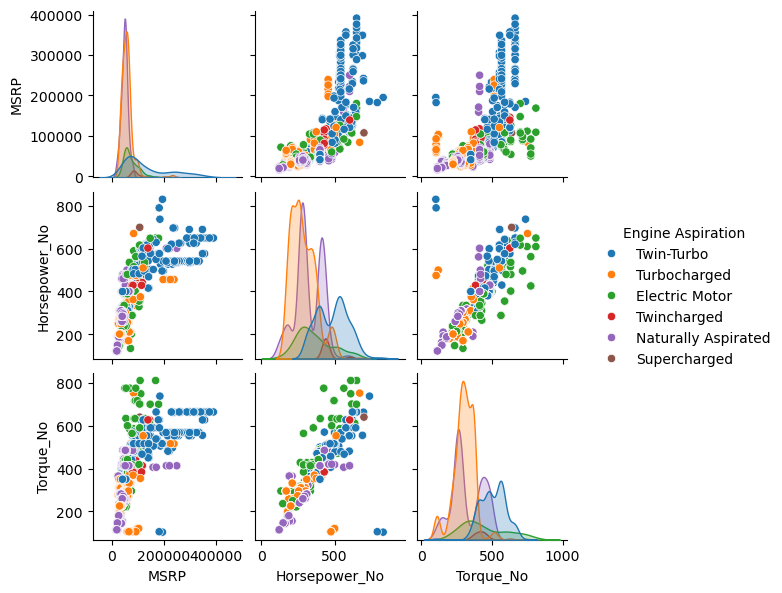

In [23]:
# Example 1 - Visualising a Subset of our data - important features
# Import visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Engine Aspiration']], hue = 'Engine Aspiration', height = 2)

Here is the table with **only the first 3 columns**:

| **Aspiration Type**             | **How It Works**                                                      | **Main Function**                                    |
| ------------------------------- | --------------------------------------------------------------------- | ---------------------------------------------------- |
| Naturally Aspirated (NA)        | Air enters the engine using atmospheric pressure only                 | Supplies air for combustion without forced induction |
| Turbocharged                    | Exhaust gases drive a turbine to force compressed air into the engine | Increases power and efficiency by forcing more air   |
| Supercharged                    | Engine-driven compressor forces air into intake                       | Provides immediate power boost                       |
| Twin-Turbocharged               | Uses two turbochargers                                                | Improves performance across RPM range                |
| Twin-Charged                    | Uses both turbocharger and supercharger                               | Combines low-RPM and high-RPM power                  |
| Electric Turbo (E-Turbo)        | Electric motor spins the turbocharger                                 | Eliminates turbo lag                                 |
| Ram Air                         | Vehicle speed forces air into intake                                  | Improves high-speed air intake                       |
| Hybrid Boost (Turbo + Electric) | Turbo assisted by electric motor                                      | Enhances efficiency and response                     |

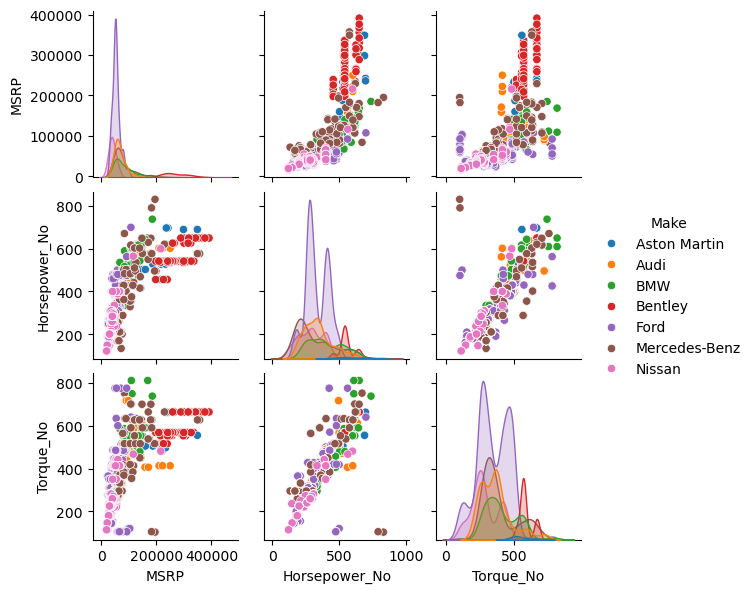

In [24]:
# Example 2 - Visualising a Subset of our data - important features
# Import visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']], hue = 'Make', height = 2)

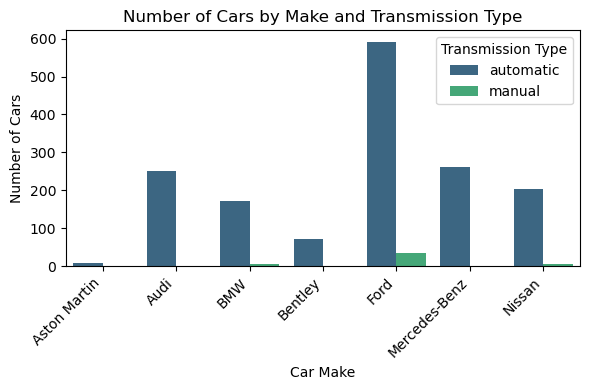

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=car_data, x='Make', hue='Transmission', palette='viridis')
plt.title('Number of Cars by Make and Transmission Type')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()

**notice that some luxury brands exclusively show automatic transmissions, while other brands might have a noticeable presence of manual options, perhaps in sportier or entry-level models.**

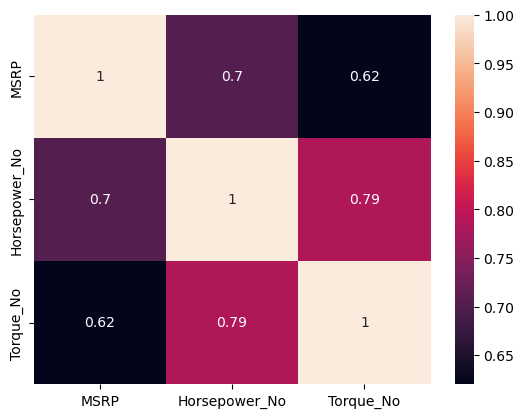

In [26]:
## Correlations with Heatmap
n_variables = ['MSRP','Horsepower_No','Torque_No']

pc = new_car_data[n_variables].corr(method ='pearson')

ax = sns.heatmap(pc, annot=True)

In [27]:
new_car_data.shape

(1610, 9)

In [28]:
new_car_data.head()

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0


### **Step 6:** Convert Categorical Data into Numbers

In [29]:
# Making categorical variables into numeric representation
new_car_data = pd.get_dummies(new_car_data, columns = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission'])

new_car_data.shape

(1610, 37)

### **Step 7:** Split Data into Features and Target
X = Features

y = Target

In [30]:
# Split the data into X & y

X = new_car_data.drop(['MSRP'], axis = 1).values
y = new_car_data['MSRP'].astype(int)
print(X.shape)
print(y.shape)

(1610, 36)
(1610,)


In [31]:
# Split the data into training & testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288, 36)
(322, 36)
(1288,)
(322,)


### **Step 8 :** Apply the Machine Learning Algorithm
We will Apply Regression algorithm as target variable column is Continues column

In [32]:
# Import ML library
from sklearn.linear_model import LinearRegression

# Model Instance
lm = LinearRegression(fit_intercept = True)

# model fitting with Train data
lm.fit(X_train, y_train)

# prediction with test Data
y_pred = lm.predict(X_train)
all_df_predict = lm.predict(X)

### **Step 9:** Test Model Performace with Metrics

In [33]:
# Model Accuracy on training dataset
from sklearn.metrics import r2_score
print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )

The Accuracy  on the training dataset is:  0.895779183244086
The Accuracy r2  on the training dataset prediction is:  0.895779183244086


In [34]:
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

The Accuracy  on the testing dataset is:  0.9198625302493009


In [35]:
# The Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

The RMSE  on the training dataset is:  17421.7784480966
The RMSE  on the testing dataset is:  16534.59457197365


## More Information about Metrics

#### R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
####  RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#### MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

### **Step 10:** Storing Our Model & Results

In [36]:
# Storing the ML Model
import pickle
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lm, f)

In [37]:
# Adding the predicted values
car_data['MSRP Predictions'] = all_df_predict

# Expoprting all the data with predictions
car_data.to_excel("data_with_pred.xlsx")

## CLassification Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
# Calculating FI
feature_importance_list = [] # Initialize an empty list to store feature importance dataframes
for i, column in enumerate(new_car_data.drop('MSRP', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    feature_importance_list.append(fi) # Append each feature importance dataframe to the list

# Concatenate all feature importance dataframes into a single DataFrame
final_fi = pd.concat(feature_importance_list, ignore_index=True)

# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index(drop=True)
final_fi

Importance of feature Horsepower_No:, 0.247
Importance of feature Torque_No:, 0.123
Importance of feature Make_Aston Martin:, 0.000
Importance of feature Make_Audi:, 0.023
Importance of feature Make_BMW:, 0.014
Importance of feature Make_Bentley:, 0.013
Importance of feature Make_Ford:, 0.124
Importance of feature Make_Mercedes-Benz:, 0.021
Importance of feature Make_Nissan:, 0.006
Importance of feature Body Size_Compact:, 0.021
Importance of feature Body Size_Large:, 0.043
Importance of feature Body Size_Midsize:, 0.032
Importance of feature Body Style_Cargo Minivan:, 0.001
Importance of feature Body Style_Cargo Van:, 0.025
Importance of feature Body Style_Convertible:, 0.007
Importance of feature Body Style_Convertible SUV:, 0.001
Importance of feature Body Style_Coupe:, 0.008
Importance of feature Body Style_Hatchback:, 0.000
Importance of feature Body Style_Passenger Minivan:, 0.001
Importance of feature Body Style_Passenger Van:, 0.001
Importance of feature Body Style_Pickup Truck

,Variable,Feature Importance Score
0,Horsepower_No,0.246967
1,Make_Ford,0.123919
2,Torque_No,0.122594
3,Engine Aspiration_Turbocharged,0.087128
4,Body Size_Large,0.042774
5,Body Style_SUV,0.032605
6,Body Size_Midsize,0.031677
7,Drivetrain_RWD,0.031109
8,Engine Aspiration_Naturally Aspirated,0.028327
9,Drivetrain_4WD,0.028094


In [40]:
# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288, 36)
(322, 36)
(1288,)
(322,)


In [41]:
# Storing the Feature Importances
final_fi['Feature Importance Score'] = final_fi['Feature Importance Score'].round(4)
final_fi = final_fi.head(27)
final_fi.to_excel("feature_importance.xlsx")

### **Step 11 :**  Streamlit App - Deployment

**`pip install streamlit`**

In [42]:
# Install Streamlit
#!pip install streamlit
# Import Streamlit
import streamlit as st